In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [89]:
# test_dir = "dev_clean"
# test_dir = "dev_other"
test_dir = "test_clean"
# test_dir = "test_other"
os.makedirs("plots", exist_ok=True)
scores_path = "scores_"+test_dir+".json"
# scores_path = "scores.json"

In [90]:
with open(scores_path, 'r') as f:
    scores = json.load(f)
scores.keys(), scores["0.95"].keys()

(dict_keys(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.999', '0.9999']),
 dict_keys(['gpt2', 'bert', 'gpt2_masks', 'bert_masks', 'asr']))

In [91]:
def plot_scores(test_dir, error="WER"):
    models = ['gpt2', 'bert', 'gpt2_masks', 'bert_masks', 'asr']
    plt.figure(figsize=(10,5))
    # idx = -1
    idx = len(list(scores.keys()))
    for model in models:
        model_scores = []
        for lmbda in scores.keys():
            model_scores.append([float(lmbda),scores[lmbda][model][error] * 100])
        model_scores = np.array(model_scores)
        model_scores_sorted = model_scores[model_scores[:, 0].argsort()]
        if model == "asr":
            plt.plot(model_scores_sorted[:idx,0], model_scores_sorted[:idx,1], color="k", label=model)
        else:
            plt.plot(model_scores_sorted[:idx,0], model_scores_sorted[:idx,1], marker="o", label=model)
    plt.xscale("logit")
    plt.xticks(model_scores_sorted[:idx,0], model_scores_sorted[:idx,0], rotation=90)
    # plt.xticks(range(len(list(scores.keys())[:idx])),list(scores.keys())[:idx])
    plt.title(f"{error} vs. $\lambda$")
    plt.ylabel(error)
    plt.xlabel("$\lambda$")
    plt.legend()
    sns.despine()
    plt.savefig(f"plots/{test_dir}_{error}.png")

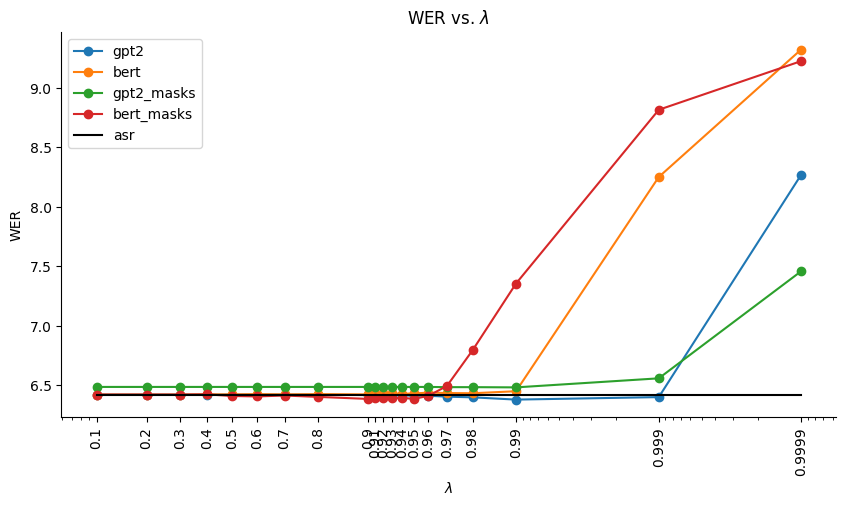

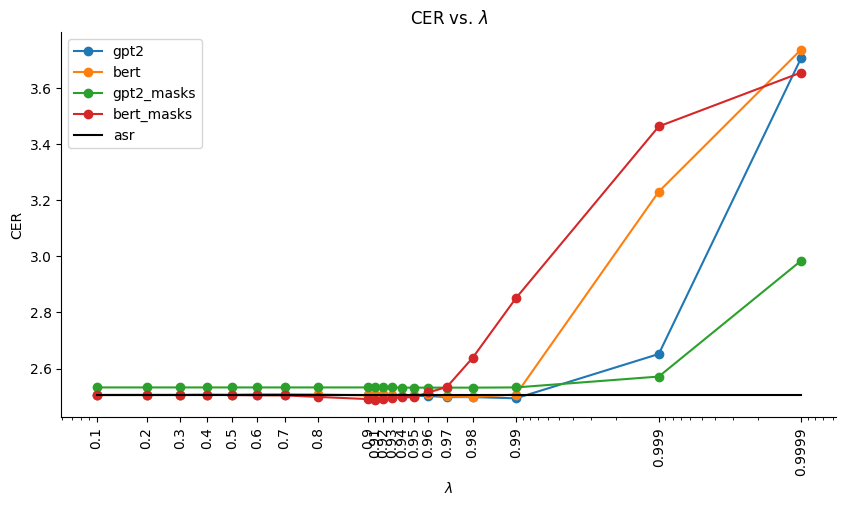

In [92]:
plot_scores(test_dir, "WER")
plot_scores(test_dir, "CER")